# Voronoi Diagram
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [imgFX_voronoi.ipynb](https://github.com/diegoinacio/creative-coding-notebooks/blob/master/Generative/imgFX_voronoi.ipynb)
---
Image effect algorithm that produces different results based on different distance metrics.

[Voronoi diagram](https://en.wikipedia.org/wiki/Voronoi_diagram) defined by distance between the pixel matrix $\large m$ and the subset of the central points $\large c$ (randomicaly defined) given your respectively index, which are them spacial coordinates $\large x$ and $\large y$. Different effects are made with different distance metrics.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random, math, time
from PIL import Image as image

from _utils import *

## 1. Euclidean distance
---
Diagram defined by [euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) which term is the $L_2$ norm:
$$ \displaystyle \large
d(m,c) \mapsto \|m-c\|_2 = \left[\sum_{i}^{n}(m_i-c_i)^2\right]^\frac{1}{2} = \sqrt{\sum_{i}^{n}(m_i-c_i)^2}
$$

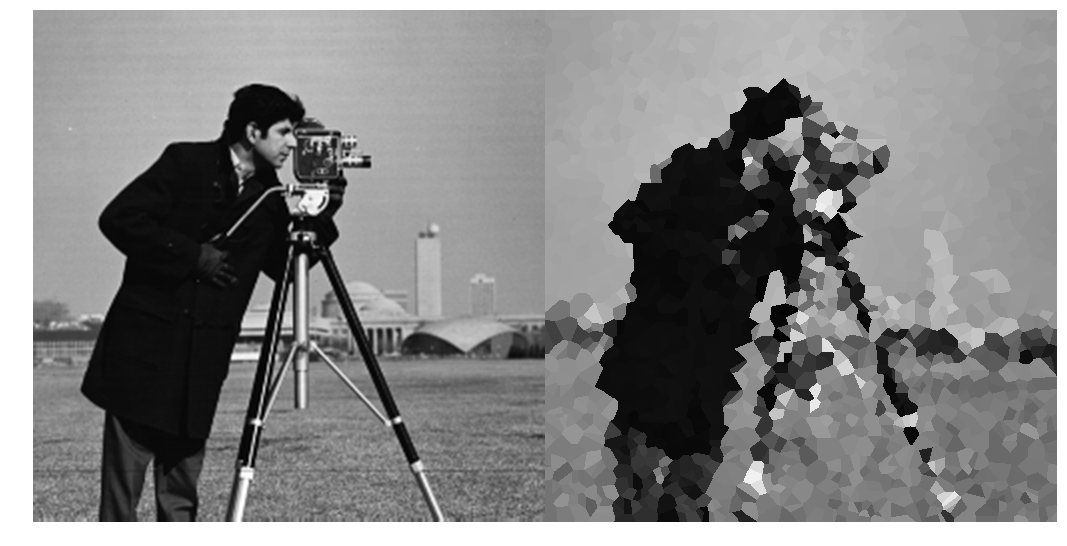

Wall time: 38.6 s


In [3]:
%%time
# parameters
n = 2048       # number of points c
sb = 4         # space between slices
BG = (0, 0, 0) # background color

# init
img = image.open('../_data/cameraman.png')
imx = img.size[0]
imy = img.size[1]
imgIn = image.new('RGB', img.size)
imgIn.paste(img)
imgOut = image.new('RGB', img.size, BG)

# execution
cx = np.random.randint(0, imx, n)
cy = np.random.randint(0, imy, n)
pop = np.array([cx, cy]).T

for y in range(imy):
    for x in range(imx):
        d = np.sum(((x, y) - pop)**2, axis=1)**0.5
        NP = pop[np.argmin(d)]
        cd = imgIn.getpixel((int(NP[0]), int(NP[1])))
        imgOut.putpixel((x, y), cd)

output = np.array([np.asarray(imgIn),
                   np.asarray(imgOut)])
panel(output, (2, 1))

## 2. Manhattan
---
Diagram defined by [manhattan distance](https://en.wikipedia.org/wiki/Taxicab_geometry) (or Taxicab geometry) which term is the $L_1$ norm:
$$ \displaystyle \large
d(m,c) \mapsto \|m-c\|_1 = \sum_{i}^{n}|m_i-c_i|
$$

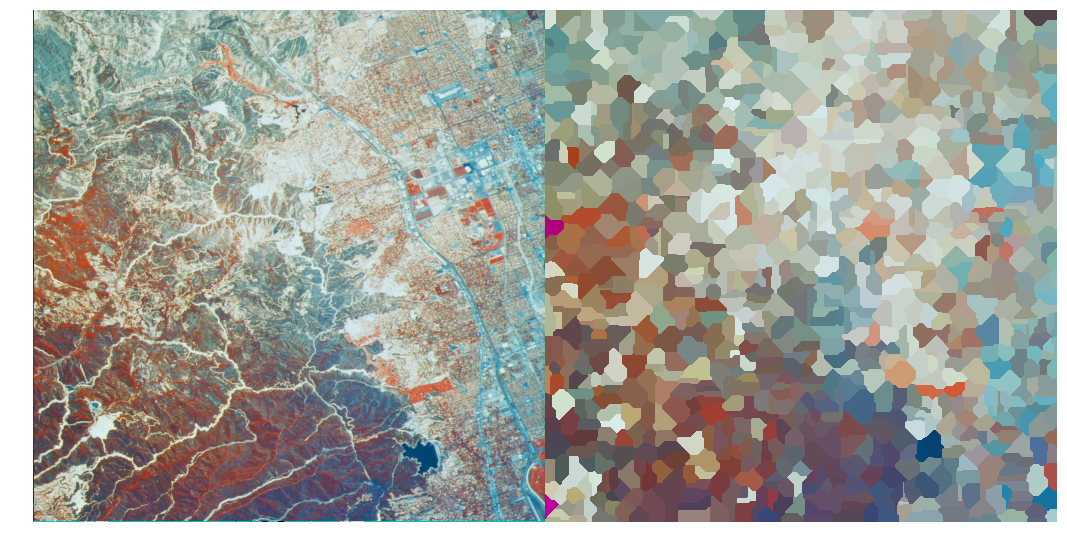

Wall time: 9.59 s


In [4]:
%%time
# parâmetros
n = 1024       # number of points c
sb = 4         # space between slices
BG = (0, 0, 0) # background color

# init
img = image.open('../_data/aerial03.png')
imx = img.size[0]
imy = img.size[1]
imgIn = image.new('RGB', img.size)
imgIn.paste(img)
imgOut = image.new('RGB', img.size, BG)

# execution
cx = np.random.randint(0, imx, n)
cy = np.random.randint(0, imy, n)
pop = np.array([cx, cy]).T

for y in range(imy):
    for x in range(imx):
        d = np.sum(abs((x, y) - pop), axis=1)
        NP = pop[np.argmin(d)]
        cd = imgIn.getpixel((int(NP[0]), int(NP[1])))
        imgOut.putpixel((x, y), cd)

output = np.array([np.asarray(imgIn),
                   np.asarray(imgOut)])
panel(output, (2, 1))

## 3. Chebyshev
---
Diagram defined by [chebyshev distance](https://en.wikipedia.org/wiki/Chebyshev_distance) which term is the $L_\infty$ norm:
$$ \displaystyle \large
d(m,c) \mapsto \|m-c\|_\infty = \lim_{p\to\infty} \left(\sum_{i}^{n}|m_i-c_i|^p\right)^\frac{1}{p} = \overset{n}{\underset{i}{\max}}|m_i-c_i|
$$

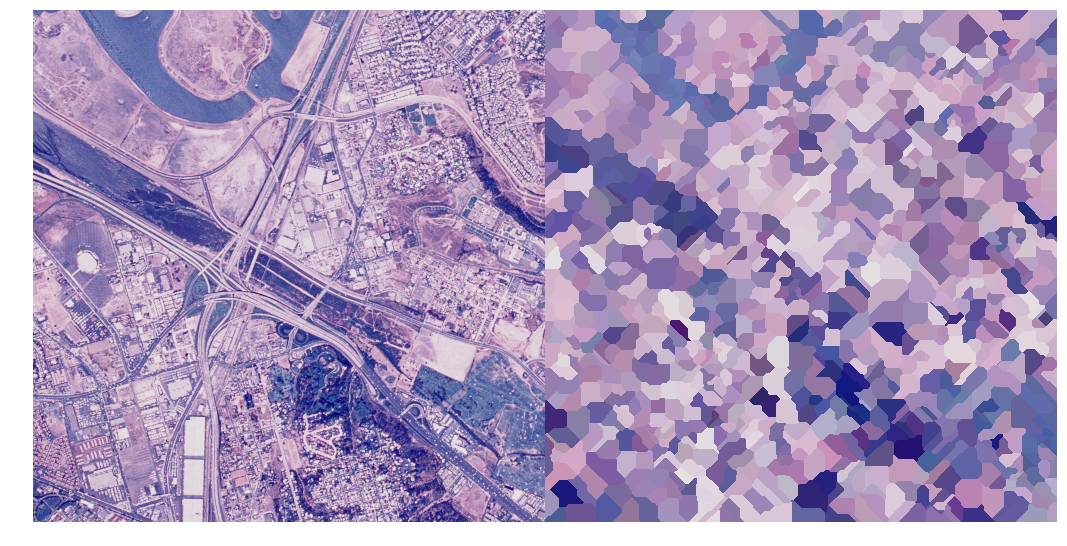

Wall time: 9.06 s


In [5]:
%%time
# parameters
n = 1024       # number of points c
sb = 4         # space between slices
BG = (0, 0, 0) # background color

# init
img = image.open('../_data/aerial01.png')
imx = img.size[0]
imy = img.size[1]
imgIn = image.new('RGB', img.size)
imgIn.paste(img)
imgOut = image.new('RGB', img.size, BG)

# execution
cx = np.random.randint(0, imx, n)
cy = np.random.randint(0, imy, n)
pop = np.array([cx, cy]).T

for y in range(imy):
    for x in range(imx):
        d = abs((x, y) - pop).max(axis=1)
        NP = pop[np.argmin(d)]
        cd = imgIn.getpixel((int(NP[0]), int(NP[1])))
        imgOut.putpixel((x, y), cd)

output = np.array([np.asarray(imgIn),
                   np.asarray(imgOut)])
panel(output, (2, 1))

## 4. Minkowski
---
Diagram defined by [minkowski distance](https://en.wikipedia.org/wiki/Minkowski_distance) which term is the $L_p$ norm and generalizes all other using the *minkowski's parameter* $p$:
$$ \displaystyle \large
d(m,c) \mapsto \|m-c\|_p = \left(\sum_{i}^{n}|m_i-c_i|^p\right)^\frac{1}{p}
$$

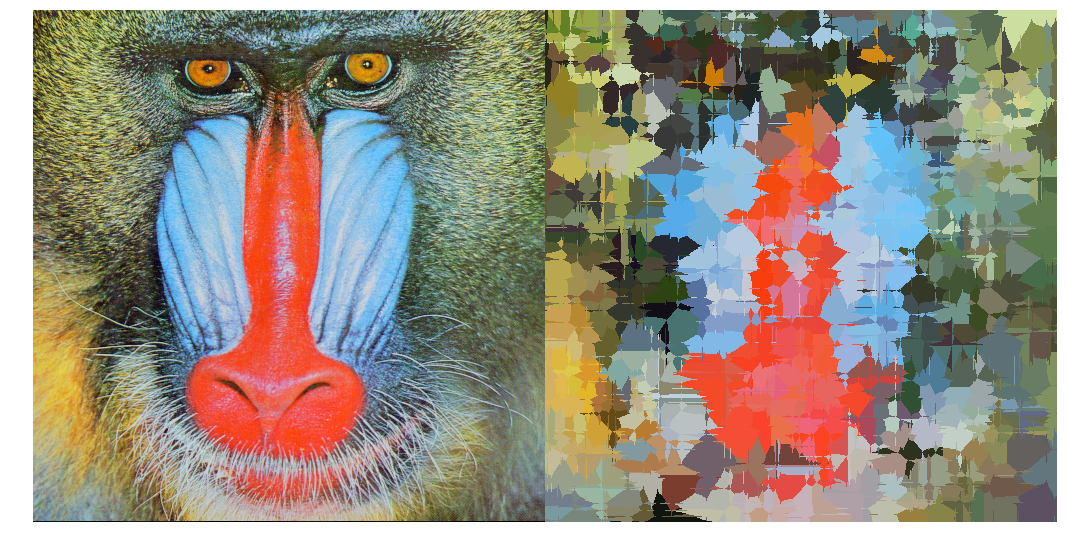

Wall time: 24.5 s


In [6]:
%%time
# parameters
n = 512        # number of points c
sb = 4         # space between slices
p = 0.5        # minkowski's parameter
BG = (0, 0, 0) # background color

# init
img = image.open('../_data/babuino.png')
imx = img.size[0]
imy = img.size[1]
imgIn = image.new('RGB', img.size)
imgIn.paste(img)
imgOut = image.new('RGB', img.size, BG)

# execution
cx = np.random.randint(0, imx, n)
cy = np.random.randint(0, imy, n)
pop = np.array([cx, cy]).T

for y in range(imy):
    for x in range(imx):
        d = np.sum(abs((x, y) - pop)**p, axis=1)**(1/p)
        NP = pop[np.argmin(d)]
        cd = imgIn.getpixel((int(NP[0]), int(NP[1])))
        imgOut.putpixel((x, y), cd)

output = np.array([np.asarray(imgIn),
                   np.asarray(imgOut)])
panel(output, (2, 1))